## Preparation

In [ ]:
!python --version

Python 3.10.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.combine import SMOTEENN, SMOTETomek
# save model
import logging
import joblib
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# model
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, balanced_accuracy_score, confusion_matrix

In [ ]:
dirname = '/content/drive/MyDrive/Colab_Notebooks/Thesis/'
model_dirname = '/content/drive/MyDrive/Colab_Notebooks/Thesis/model/'
train = pd.read_csv(dirname + 'train.csv')
val = pd.read_csv(dirname + 'val.csv')
test = pd.read_csv(dirname + 'test.csv')

## Without SMOTE

### Basic

In [ ]:
scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(train.drop('match', axis=1))
X_scaled_val = scaler.transform(val.drop('match', axis=1))

In [ ]:
# Calculate the number of negative and positive instances
neg = sum(train['match'].values == 0)
pos = sum(train['match'].values == 1)

print(neg,pos)

# Calculate the ratio of negative to positive instances
scale_pos_weight = neg / pos
print(scale_pos_weight)

3494 690
5.063768115942029


INFO:root:Fitting model: KNeighborsClassifier
INFO:root:KNeighborsClassifier hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
INFO:root:KNeighborsClassifier MCC: 0.09981342198804782
INFO:root:KNeighborsClassifier BACC: 0.524515732974955


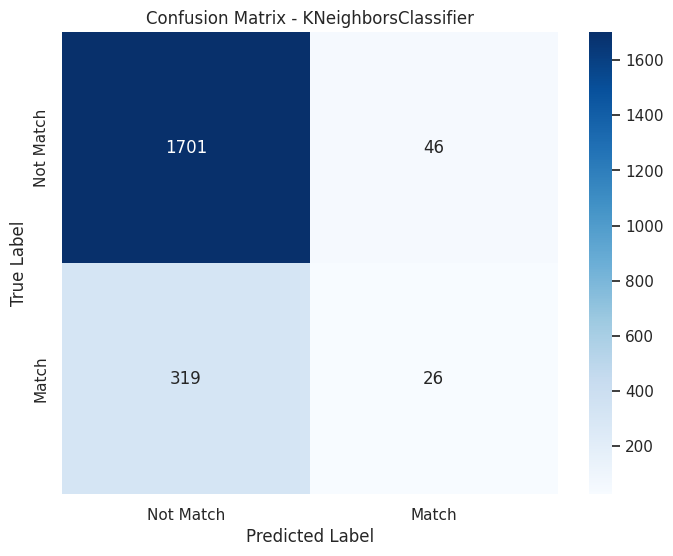

INFO:root:Fitting model: LogisticRegression
INFO:root:LogisticRegression hyperparameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
INFO:root:LogisticRegression MCC: 0.09145506766366421
INFO:root:LogisticRegression BACC: 0.5612810366425259


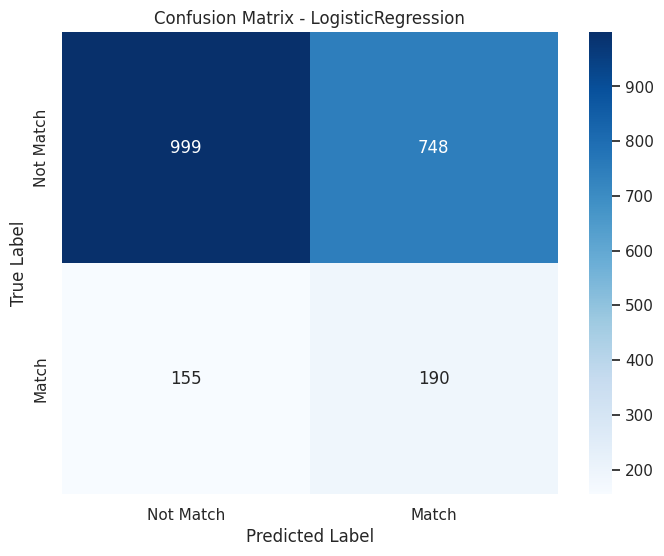

INFO:root:Fitting model: SVC
INFO:root:SVC hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
INFO:root:SVC MCC: 0.13603877537670192
INFO:root:SVC BACC: 0.5899197796636885


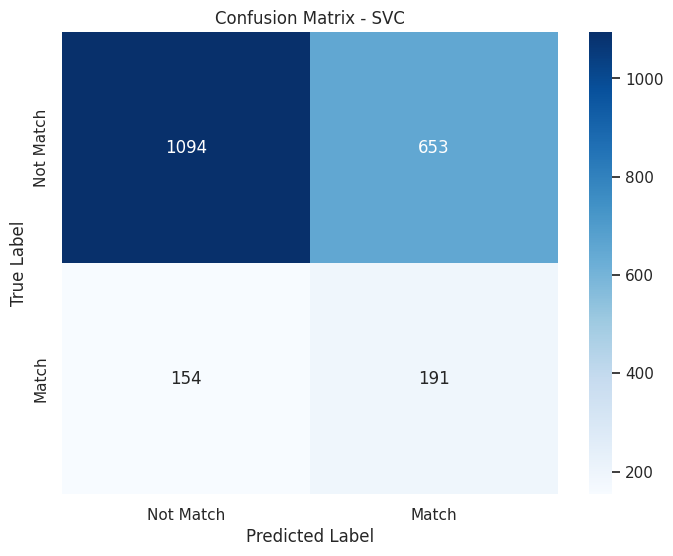

INFO:root:Fitting model: gbm
INFO:root:gbm hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 123, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
INFO:root:gbm MCC: 0.12362599576958423
INFO:root:gbm BACC: 0.5145110043718839


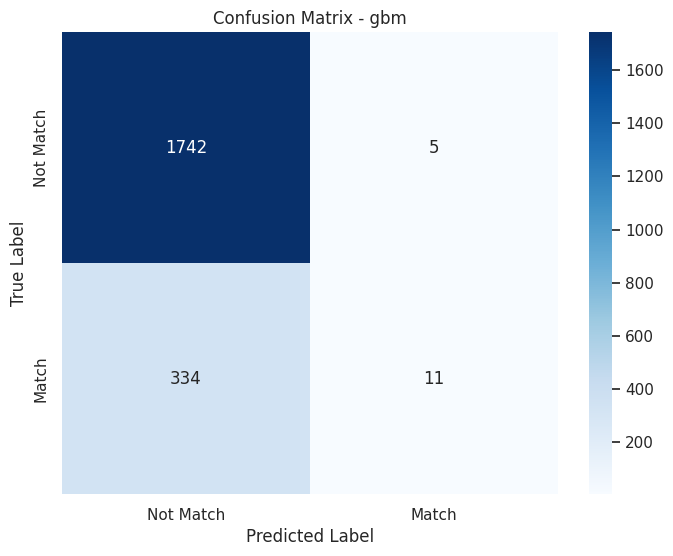

INFO:root:Fitting model: rf
INFO:root:rf hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}
INFO:root:rf MCC: 0.027932118299275145
INFO:root:rf BACC: 0.5011630704395942


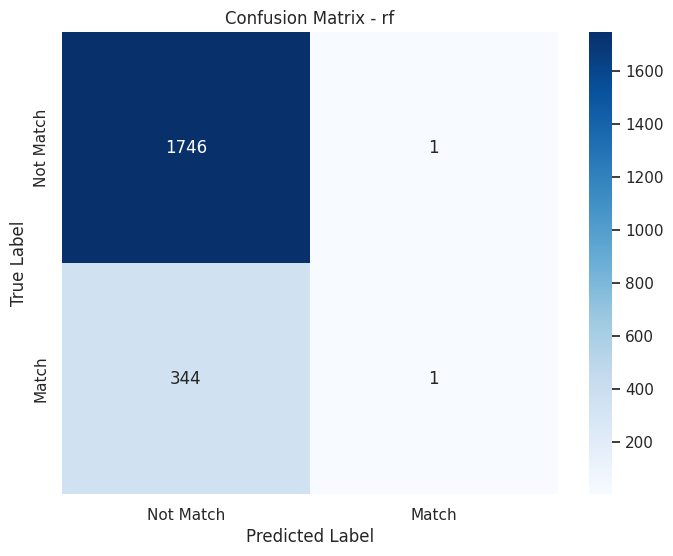

INFO:root:Fitting model: xgb
INFO:root:xgb hyperparameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 5.063768115942029, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
INFO:root:xgb MCC: 0.3742911

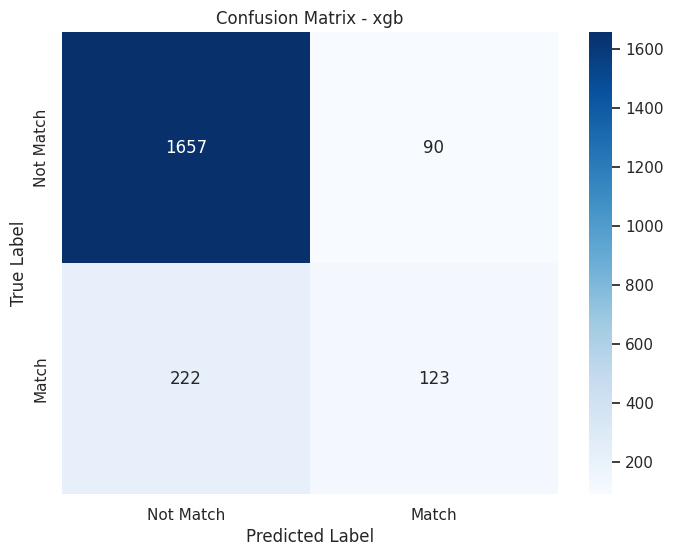

INFO:root:Fitting model: lgb


[LightGBM] [Info] Number of positive: 690, number of negative: 3494
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1767
[LightGBM] [Info] Number of data points in the train set: 4184, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.164914 -> initscore=-1.622111
[LightGBM] [Info] Start training from score -1.622111


INFO:root:lgb hyperparameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'is_unbalance': True}
INFO:root:lgb MCC: 0.372259613929214
INFO:root:lgb BACC: 0.6735654496735605


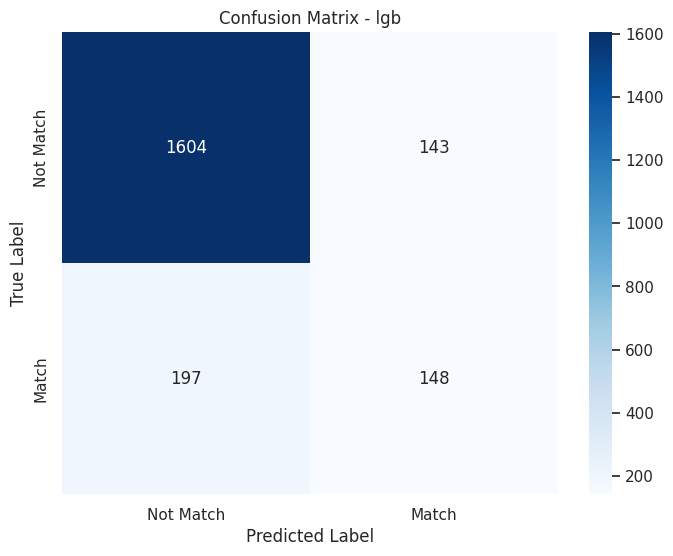

In [ ]:
def model_fit():
    logging.getLogger().setLevel(logging.INFO)
    classifiers = {
        "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=2, weights='uniform'),
        "LogisticRegression": LogisticRegression(random_state=123, class_weight='balanced'),
        "SVC": SVC(random_state=123, class_weight='balanced'),
        "gbm": GradientBoostingClassifier(random_state=123),
        "rf": RandomForestClassifier(random_state=123, class_weight = 'balanced'),
        "xgb": XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight),
        "lgb":LGBMClassifier(random_state=123, is_unbalance=True)
    }

    for name, classifier in classifiers.items():
        # Fit model
        logging.info(f"Fitting model: {name}")
        model = classifier.fit(X_scaled_train, train['match'].values)
        y_pred = classifier.predict(X_scaled_val)
        hyperparameters = model.get_params()
        logging.info(f"{name} hyperparameters: {hyperparameters}")
        joblib.dump(model, f"{model_dirname}{name}.joblib")
        # metrics
        mcc = matthews_corrcoef(val['match'].values, y_pred)
        bacc = balanced_accuracy_score(val['match'].values, y_pred)
        logging.info(f"{name} MCC: {mcc}")
        logging.info(f"{name} BACC: {bacc}")
        # Draw confusion matrix
        cm = confusion_matrix(val['match'].values, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Match', 'Match'], yticklabels=['Not Match', 'Match'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {name}')
        plt.savefig(f"{model_dirname}{name}.png")
        plt.show()
model_fit()

## With SMOTE

INFO:root:Fitting model: xgb with smoteenn
INFO:root:xgbsmoteenn MCC: 0.2104220487294314
INFO:root:xgbsmoteenn BACC: 0.581274731838431
INFO:root:Fitting model: lgb with smoteenn


[LightGBM] [Info] Number of positive: 2325, number of negative: 1590
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9981
[LightGBM] [Info] Number of data points in the train set: 3915, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.593870 -> initscore=0.379986
[LightGBM] [Info] Start training from score 0.379986


INFO:root:lgbsmoteenn MCC: 0.22135669291151824
INFO:root:lgbsmoteenn BACC: 0.5894344756642858
INFO:root:Fitting model: xgb with smotetomek
INFO:root:xgbsmotetomek MCC: 0.2498278271028827
INFO:root:xgbsmotetomek BACC: 0.5641638253569266
INFO:root:Fitting model: lgb with smotetomek


[LightGBM] [Info] Number of positive: 3282, number of negative: 3282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9972
[LightGBM] [Info] Number of data points in the train set: 6564, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


INFO:root:lgbsmotetomek MCC: 0.13534438510852975
INFO:root:lgbsmotetomek BACC: 0.5258737545937964


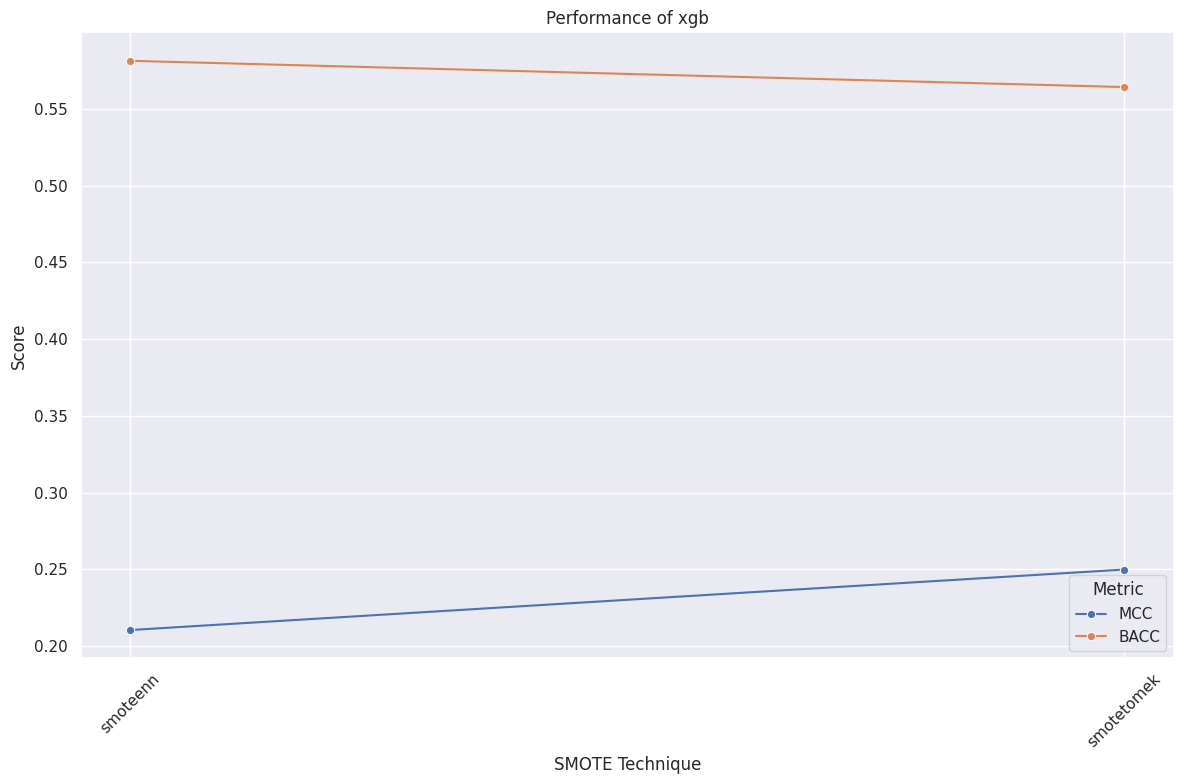

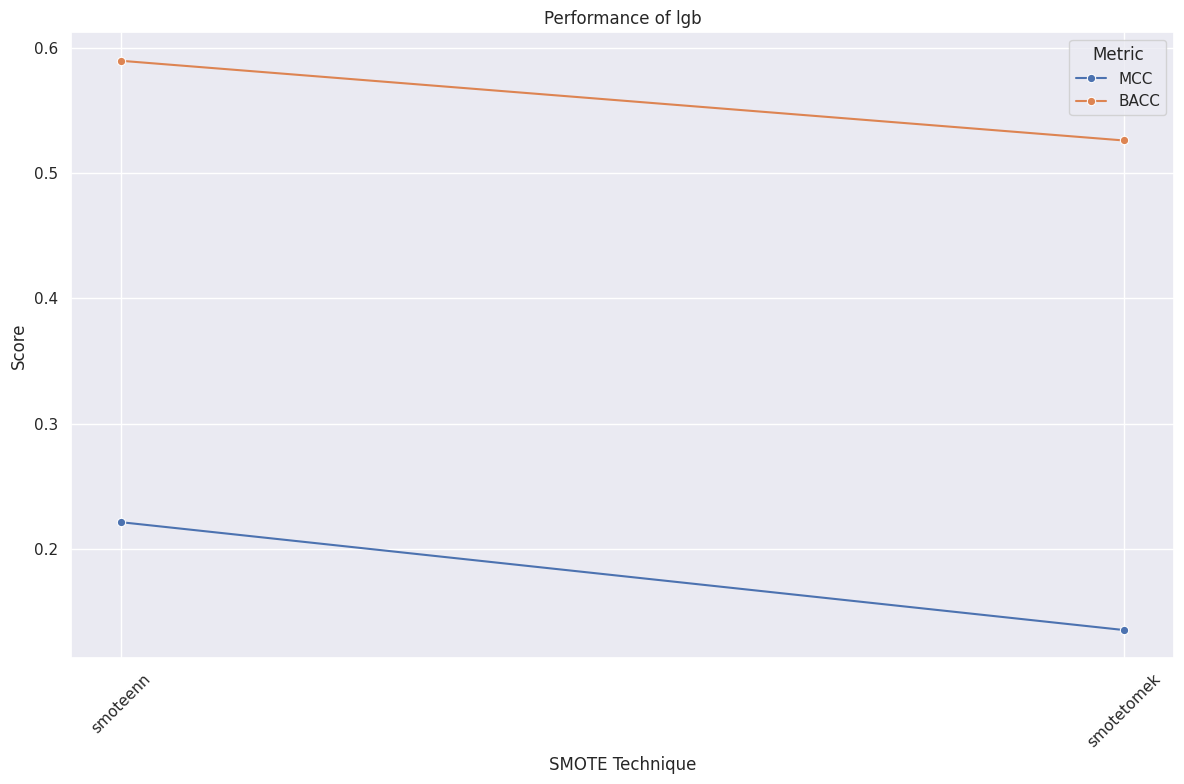

In [ ]:
def model_fit_smote():
    logging.getLogger().setLevel(logging.INFO)
    smote_techniques = {
        "smoteenn": SMOTEENN(random_state=123),
        "smotetomek": SMOTETomek(random_state=123)
    }

    classifiers = {
        "xgb": XGBClassifier(objective='binary:logistic', random_state=123),
        "lgb": LGBMClassifier(random_state=123)
    }

    results = {name: {'mcc': [], 'bacc': []} for name in classifiers.keys()}

    for smote_name, smote_technique in smote_techniques.items():
        train_resampled_features, train_resampled_labels = smote_technique.fit_resample(train.drop('match', axis=1), train['match'].values)
        scale_pos_weight_smote = sum(train_resampled_labels == 0) / sum(train_resampled_labels == 1)

        for clf_name, classifier in classifiers.items():
            logging.info(f"Fitting model: {clf_name} with {smote_name}")
            if clf_name == "xgb":
                # For XGBClassifier, set scale_pos_weight parameter
                model = classifier.set_params(scale_pos_weight=scale_pos_weight_smote)
            else:
                model = classifier

            model.fit(train_resampled_features, train_resampled_labels)
            y_pred = model.predict(val.drop('match', axis=1))

            # Calculate metrics
            mcc = matthews_corrcoef(val['match'].values, y_pred)
            bacc = balanced_accuracy_score(val['match'].values, y_pred)

            logging.info(f"{clf_name}{smote_name} MCC: {mcc}")
            logging.info(f"{clf_name}{smote_name} BACC: {bacc}")
            # Save metrics
            results[clf_name]['mcc'].append(mcc)
            results[clf_name]['bacc'].append(bacc)

    # Set Seaborn theme
    sns.set_theme()

    # Plotting results using Seaborn
    for clf_name in classifiers.keys():
        metrics_df = pd.DataFrame({
            'SMOTE Technique': list(smote_techniques.keys()) * 2,
            'Score': results[clf_name]['mcc'] + results[clf_name]['bacc'],
            'Metric': ['MCC'] * len(smote_techniques) + ['BACC'] * len(smote_techniques)
        })

        plt.figure(figsize=(12, 8))
        sns.lineplot(data=metrics_df, x='SMOTE Technique', y='Score', hue='Metric', marker='o')
        plt.xlabel('SMOTE Technique')
        plt.ylabel('Score')
        plt.title(f'Performance of {clf_name}')
        plt.legend(title='Metric')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f"{clf_name}_performance.png")
        plt.show()

# Assuming train and val are defined elsewhere
model_fit_smote()


## Tuned

In [ ]:
# Define the MCC scoring function
scorer = make_scorer(matthews_corrcoef)


In [ ]:
smoteenn = SMOTEENN(random_state=123)
smotetomek = SMOTETomek(random_state=123)

### RF

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),  # Randomly sample from the range [10, 200)
    'max_depth' : randint(3, 20),
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'bootstrap': [True,False]
}

# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = RandomForestClassifier(random_state=123, class_weight='balanced')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(train.drop('match', axis=1), train['match'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for RandomForestClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(val.drop('match', axis=1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(val['match'].values, y_pred)
accuracy = accuracy_score(val['match'].values, y_pred)
f1 = f1_score(val['match'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),  # Randomly sample from the range [10, 200)
    'max_depth' : randint(3, 20),
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'bootstrap': [True,False]
}

# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = RandomForestClassifier(random_state=123, class_weight='balanced')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(train.drop('match', axis=1), train['match'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for RandomForestClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(val.drop('match', axis=1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(val['match'].values, y_pred)
accuracy = accuracy_score(val['match'].values, y_pred)
f1 = f1_score(val['match'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Best hyperparameters for RandomForestClassifier: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 76}
Validation Set Metrics:
MCC: 0.3202857186605273
Accuracy: 0.8518164435946463
F1-score: 0.33476394849785407


### XGB

In [ ]:
param_grid = {
    'n_estimators': np.arange(100, 201, 50),
    'max_depth': np.arange(3, 10, 1),
    'eta': np.arange(0.01, 0.20, 0.02),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.001, 1.0, 0.1),
    'reg_lambda': np.arange(0.001, 1.0, 0.1),
    'gamma': np.arange(0, 1.1, 0.2)
}


train_resampled_features, train_resampled_labels = smotetomek.fit_resample(train.drop('match', axis=1), train['match'].values)
model = XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(train_resampled_features, train_resampled_labels)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for XGBClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(val.drop('match', axis=1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(val['match'].values, y_pred)
bacc = balanced_accuracy_score(val['match'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"BACC: {bacc}")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-ca3e4cec1a03>", line 27, in <cell line: 27>
    random_search.fit(train_resampled_features, train_resampled_labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1768, in _run_search
    evaluate_candidates(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 2007, in __call__
    ret

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(100, 201, 50),
    'max_depth': np.arange(3, 10, 1),
    'eta': np.arange(0.01, 0.20, 0.02),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.001, 1.0, 0.1),
    'reg_lambda': np.arange(0.001, 1.0, 0.1),
    'gamma': np.arange(0, 1.1, 0.2)
}

# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(train.drop('match', axis=1), train['match'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for XGBClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(val.drop('match', axis=1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(val['match'].values, y_pred)
bacc = balanced_accuracy_score(val['match'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"BACC: {bacc}")

Best hyperparameters for XGBClassifier: {'subsample': 0.7999999999999999, 'reg_lambda': 0.901, 'reg_alpha': 0.801, 'n_estimators': 200, 'max_depth': 8, 'gamma': 1.0, 'eta': 0.06999999999999999, 'colsample_bytree': 0.5}
Validation Set Metrics:
MCC: 0.4350909161471695
BACC: 0.6566859958686941


### GBM

In [ ]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': np.arange(0.01, 1, 0.02),
    'n_estimators':np.arange(100, 501, 50),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'criterion':['friedman_mse', 'squared_error'],
    'min_samples_split':np.arange(200, 1001, 200),
    'min_samples_leaf':np.arange(30, 101, 10),
    'max_depth': np.arange(3, 11, 1),


}
# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = GradientBoostingClassifier(random_state=123)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(train.drop('match', axis=1), train['match'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for GradientBoostingClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(val.drop('match', axis=1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(val['match'].values, y_pred)
accuracy = accuracy_score(val['match'].values, y_pred)
f1 = f1_score(val['match'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Best hyperparameters for GradientBoostingClassifier: {'subsample': 0.7999999999999999, 'n_estimators': 400, 'min_samples_split': 200, 'min_samples_leaf': 40, 'max_depth': 5, 'loss': 'log_loss', 'learning_rate': 0.5499999999999999, 'criterion': 'squared_error'}
Validation Set Metrics:
MCC: 0.3459471647052849
Accuracy: 0.8494263862332696
F1-score: 0.4


### LGB

In [ ]:
param_grid = {
    'n_estimators':np.arange(100, 501, 50),
    'num_leaves': np.arange(30, 50, 5),
    'learning_rate': np.arange(0.05, 0.21, 0.05),
    'max_depth': np.arange(3, 11, 1),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}
# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = LGBMClassifier(random_state=123, is_unbalance=True, verbose = -1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(train.drop('match', axis=1), train['match'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for LGBMClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(val.drop('match', axis=1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(val['match'].values, y_pred)
bacc = balanced_accuracy_score(val['match'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"BACC: {bacc}")

Best hyperparameters for LGBMClassifier: {'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 45, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.15000000000000002}
Validation Set Metrics:
MCC: 0.5005825740455838
BACC: 0.6740042972217383


INFO:root:Fitting model: SVC
INFO:root:SVC hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
INFO:root:SVC MCC: 0.059120690710141054
INFO:root:SVC BACC: 0.5395236554590478


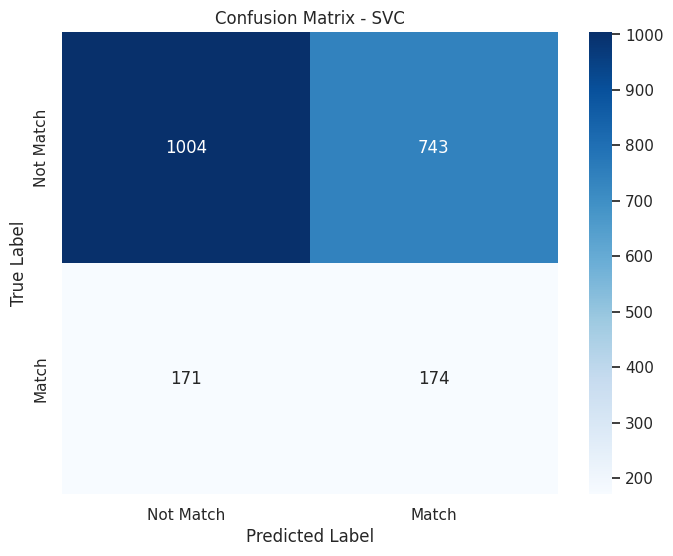

INFO:root:Fitting model: xgb
INFO:root:xgb hyperparameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 1.0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': 0.801, 'reg_lambda': 0.901, 'sampling_method': None, 'scale_pos_weight': 5.063768115942029, 'subsample': 0.7999999999999999, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta': 0.069999999

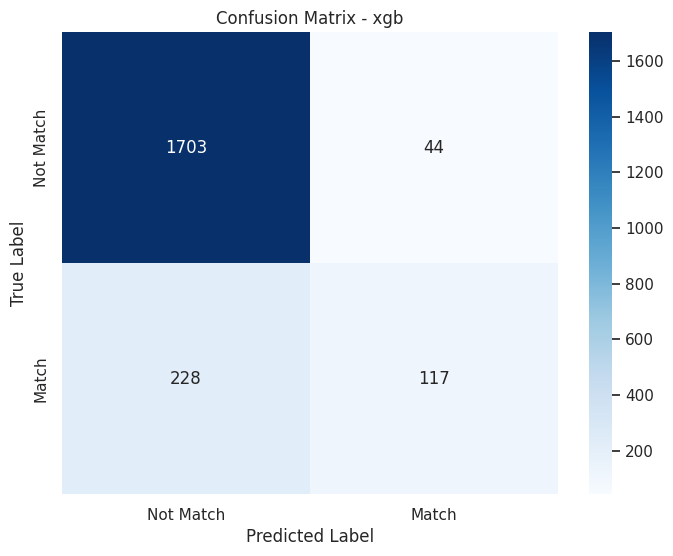

INFO:root:Fitting model: lgb


[LightGBM] [Info] Number of positive: 690, number of negative: 3494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 4184, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.164914 -> initscore=-1.622111
[LightGBM] [Info] Start training from score -1.622111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

INFO:root:lgb hyperparameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.15000000000000002, 'max_depth': 7, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 300, 'n_jobs': None, 'num_leaves': 45, 'objective': None, 'random_state': 123, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'is_unbalance': True}
INFO:root:lgb MCC: 0.4639022455482103
INFO:root:lgb BACC: 0.6627328007433032


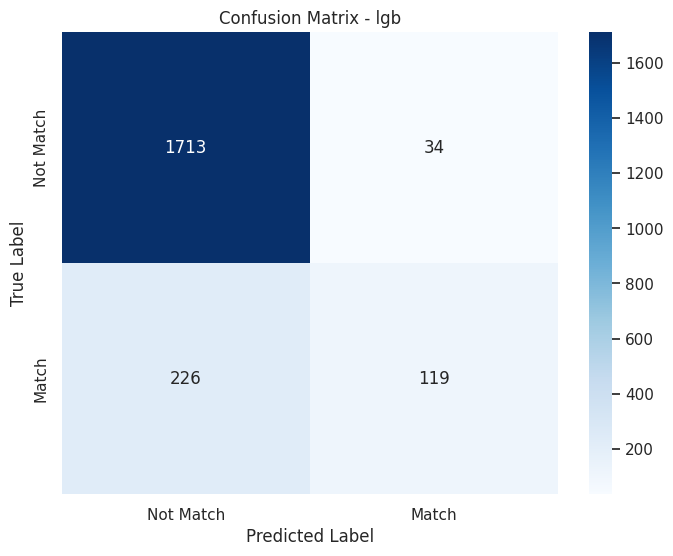

In [ ]:
def model_fit_best():
    logging.getLogger().setLevel(logging.INFO)
    # Create pipeline with the preprocessor and the model
    classifiers = {
        "SVC": SVC(random_state=123, class_weight='balanced'),
        "xgb": XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight, subsample = 0.7999999999999999, reg_lambda = 0.901, reg_alpha = 0.801, n_estimators = 200, max_depth = 8, gamma = 1.0, eta = 0.06999999999999999, colsample_bytree = 0.5),
        "lgb":LGBMClassifier(random_state=123, is_unbalance=True, reg_lambda = 0.1, reg_alpha = 0.1, num_leaves = 45, n_estimators = 300, max_depth = 7, learning_rate = 0.15000000000000002)
    }

    for name, classifier in classifiers.items():
        # Fit model
        logging.info(f"Fitting model: {name}")
        model = classifier.fit(train.drop('match', axis=1), train['match'].values)
        y_pred = classifier.predict(test.drop('match', axis=1))
        hyperparameters = model.get_params()
        logging.info(f"{name} hyperparameters: {hyperparameters}")
        # Save the entire pipeline
        joblib.dump(model, f"{model_dirname}{name}.joblib")
        # metrics
        mcc = matthews_corrcoef(test['match'].values, y_pred)
        bacc = balanced_accuracy_score(test['match'].values, y_pred)
        logging.info(f"{name} MCC: {mcc}")
        logging.info(f"{name} BACC: {bacc}")
        # Draw confusion matrix
        cm = confusion_matrix(test['match'].values, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Match', 'Match'], yticklabels=['Not Match', 'Match'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {name}')
        plt.savefig(f"{model_dirname}{name}.png")
        plt.show()
model_fit_best()